#### Prepare notebook with relevant modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ODPworkspace_demotools import mapOQS, pydeck_plot
from odp.client import OdpClient # The SDK

In [6]:
client = OdpClient()

## Geospatial query of PGS data
- Either define a polygon manually
- Or use the interactive map to create a polygon

### Use a map to create a geospatial query for the API call
- Click on the 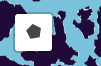 button to create a polygon for the query
- The data in this notebook is available offshore Brazil, so create a polygon there.

In [7]:
query_geometry = mapOQS()

Or define the query geometry manually (just remove the '#' and edit coordinates below)

In [10]:
query_geometry.value = "POLYGON((-37.397 -11.953, -35.640 -9.015, -32.256 -10.272, -36.079 -16.678, -37.397 -11.953))"

### Get data identifiers from catalog

In [11]:
adcp_dataset = client.catalog.get(("8767dfa3-9ee6-4b9d-8009-d2226be6c505"))
adcp_dataset.metadata.display_name

'PGS physics data - ADCP current measurements - aggregated'

In [12]:
CTD_dataset = client.catalog.get(("7f93ce41-e2ae-4f41-af41-fd7f017efd31"))
CTD_dataset.metadata.display_name

'PGS physics data - CTD profiles - aggregated'

In [13]:
biota_dataset = client.catalog.get(("c571f34a-490e-4a23-97ef-81c9efa41558"))
biota_dataset.metadata.display_name

'PGS biota data - mammal and turtle observations - aggregated'

### Request geospatially filtered data from ODP API

In [14]:
biota_data = client.tabular.select_as_list(biota_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [15]:
adcp_data = client.tabular.select_as_list(adcp_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [16]:
CTD_data = client.tabular.select_as_list(CTD_dataset, filter_query={"#AND": [{'#ST_WITHIN': ['$geometry', query_geometry.value]},{"#LESS_THAN": ["$Depth_m", 5]}]}, limit=10000)

## Visualize data

### Plot datapoints from query on a map

In [17]:
pydeck_plot([adcp_data[99::100], CTD_data, biota_data], pickable=True, zoom=3, lat=-2, lon=-35)

{
  "initialViewState": {
    "latitude": -2,
    "longitude": -35,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "DatetimeUtc": "2020-11-22T07:52:51",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.1138,
          "cur_n_ms-1": -0.0752333333333333,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -35.103953,
              -13.21929
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-22T16:14:12",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.139233333333333,
          "cur_n_ms-1": -0.0467,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -35.267366,
              -13.825978
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T00:35:42",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.0975666666666667,
          "cur_n_ms-1": -0.1582,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -35.400418,
              -14.363295
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T08:57:12",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.07065,
          "cur_n_ms-1": -0.198733333333333,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -35.450498,
              -14.958947
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T17:18:38",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.1552,
          "cur_n_ms-1": -0.109366666666667,
          "depth_m": 10.22,
          "geometry": {
            "coordinates": [
              -35.41109,
              -15.550847
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-22T07:47:51",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": 0.0219,
          "cur_n_ms-1": -0.223933333333333,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -35.102436,
              -13.21293
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-22T16:09:12",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": 0.0191166666666667,
          "cur_n_ms-1": -0.124733333333333,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -35.266313,
              -13.820304
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T00:30:42",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.0107166666666667,
          "cur_n_ms-1": -0.291966666666667,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -35.398398,
              -14.357737
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T08:52:12",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": 0.108483333333333,
          "cur_n_ms-1": -0.436333333333333,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -35.451252,
              -14.952691
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-23T17:13:41",
          "ProjectNumber": 2020081.0,
          "cur_e_ms-1": -0.004,
          "cur_n_ms-1": -0.215551724137931,
          "depth_m": 20.22,
          "geometry": {
            "coordinates": [
              -35.411597,
              -15.545088
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2020-11-22T07:42:51",
          "ProjectNumber": 2020081.0,
        

### Visualize dataframes

In [18]:
pd.DataFrame(adcp_data[99::100]).head()

,cur_e_ms-1,geometry,ProjectNumber,depth_m,cur_n_ms-1,DatetimeUtc
0,-0.113800,"{'type': 'Point', 'coordinates': [-35.103953, ...",2020081.0,10.22,-0.075233,2020-11-22T07:52:51
1,-0.139233,"{'type': 'Point', 'coordinates': [-35.267366, ...",2020081.0,10.22,-0.046700,2020-11-22T16:14:12
2,-0.097567,"{'type': 'Point', 'coordinates': [-35.400418, ...",2020081.0,10.22,-0.158200,2020-11-23T00:35:42
3,-0.070650,"{'type': 'Point', 'coordinates': [-35.450498, ...",2020081.0,10.22,-0.198733,2020-11-23T08:57:12
4,-0.155200,"{'type': 'Point', 'coordinates': [-35.41109, -...",2020081.0,10.22,-0.109367,2020-11-23T17:18:38


In [19]:
pd.DataFrame(CTD_data).head()

,DatetimeUtc,Density_sigma-T,Temp_C,Salinity_ppm,ProfileName,Pressure_dBar,geometry,Conduct_mS/cm,Project,Depth_m,Velocity_ms-1
0,2014-09-12T18:23:34,21.938,26.711,NaN,TSdip_2013121.xlsb_Profile # 9,NaN,"{'type': 'Point', 'coordinates': [-36.245667, ...",53.24,BM-SEAL-4-10-11,0.53,1537.19
1,2014-09-12T18:23:36,24.679,25.992,NaN,TSdip_2013121.xlsb_Profile # 9,NaN,"{'type': 'Point', 'coordinates': [-36.245667, ...",57.07,BM-SEAL-4-10-11,1.11,1539.09
2,2014-09-12T18:23:38,24.761,25.956,NaN,TSdip_2013121.xlsb_Profile # 9,NaN,"{'type': 'Point', 'coordinates': [-36.245667, ...",57.15,BM-SEAL-4-10-11,2.17,1539.12
3,2014-09-12T18:23:40,24.785,25.935,NaN,TSdip_2013121.xlsb_Profile # 9,NaN,"{'type': 'Point', 'coordinates': [-36.245667, ...",57.15,BM-SEAL-4-10-11,3.10,1539.11
4,2014-09-12T18:23:42,24.797,25.927,NaN,TSdip_2013121.xlsb_Profile # 9,NaN,"{'type': 'Point', 'coordinates': [-36.245667, ...",57.15,BM-SEAL-4-10-11,4.29,1539.11


In [20]:
pd.DataFrame(biota_data).head()

,Species,Family,Juveniles,Duration,geometry,Adults,Bathymetry,DateTimeStartedGMT-3,Acoustic
0,Stenella attenuata,Odontoceti,0.0,9.0,"{'type': 'Point', 'coordinates': [-36.0191, -1...",1.0,868.0,2018-06-11T06:36:00,False
1,Cetáceo grande porte,NI,1.0,18.0,"{'type': 'Point', 'coordinates': [-35.21415, -...",1.0,3878.0,2018-06-30T07:38:00,False
2,Megaptera novaeangliae,Mysticeti,0.0,53.0,"{'type': 'Point', 'coordinates': [-35.294117, ...",1.0,3804.0,2018-06-30T15:23:00,False
3,Mysticeti,Mysticeti,0.0,7.0,"{'type': 'Point', 'coordinates': [-35.291217, ...",1.0,3656.0,2018-07-11T15:29:00,False
4,Megaptera novaeangliae,Mysticeti,0.0,45.0,"{'type': 'Point', 'coordinates': [-35.868617, ...",1.0,2861.0,2018-07-16T08:09:00,False


### Plot detailed CTD data

In [15]:
CTD_data_long = client.tabular.select_as_list(CTD_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=50000)

In [16]:
CTD_df = pd.DataFrame(CTD_data_long)

In [17]:
groupedCTD = CTD_df.groupby('ProfileName')
for name, group in groupedCTD:
    plt.plot(group['Temp_C'], group['Depth_m']*-1, label=name)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs. Depth Profiles')
plt.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))  # Set the legend font size to 'small'
plt.show()

KeyError: 'ProfileName'